In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#zip function: zipping the pairs #the output is a zip object in memory.
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Unpack zip into a list
# Add the latitudes and longitudes to a list.
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
print(cities[:10])

['punta arenas', 'cape town', 'urdzhar', 'kamien pomorski', 'kapaa', 'hilo', 'fortuna', 'port elizabeth', 'rikitea', 'leningradskiy']


In [6]:
#Import the request library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbfdaf44bb34fbee10a2bcffd408aaa2


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | guanare
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | coaldale
Processing Record 8 of Set 1 | waingapu
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | banda aceh
Processing Record 12 of Set 1 | nguiu
City not found. Skipping...
Processing Record 13 of Set 1 | chaozhou
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | tiznit
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | guerrero negro
Process

Processing Record 37 of Set 4 | porto novo
Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | safaga
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | indramayu
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | morant bay
Processing Record 44 of Set 4 | marzuq
Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | havelock
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | grindavik
Processing Record 50 of Set 4 | ca mau
Processing Record 1 of Set 5 | mbanza-ngungu
Processing Record 2 of Set 5 | bilma
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | trincomalee
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | phan rang
City not found. Skipping...
Processing Record 8 of Set 5 | seoul
Processing Record 9 of Set 5 | caravelas


Processing Record 26 of Set 8 | garmsar
Processing Record 27 of Set 8 | denau
City not found. Skipping...
Processing Record 28 of Set 8 | kaseda
Processing Record 29 of Set 8 | xining
Processing Record 30 of Set 8 | la palma
Processing Record 31 of Set 8 | chodavaram
Processing Record 32 of Set 8 | udachnyy
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | broken hill
Processing Record 35 of Set 8 | zhangjiakou
Processing Record 36 of Set 8 | kavieng
Processing Record 37 of Set 8 | cabog
Processing Record 38 of Set 8 | paradwip
City not found. Skipping...
Processing Record 39 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 40 of Set 8 | tazovskiy
Processing Record 41 of Set 8 | markova
Processing Record 42 of Set 8 | bargal
City not found. Skipping...
Processing Record 43 of Set 8 | mandan
Processing Record 44 of Set 8 | havre-saint-pierre
Processing Record 45 of Set 8 | sisimiut
Processing Record 46 of Set 8 | bilibino
Processing Record 47 of Se

Processing Record 14 of Set 12 | sao lourenco do sul
Processing Record 15 of Set 12 | davila
Processing Record 16 of Set 12 | play cu
City not found. Skipping...
Processing Record 17 of Set 12 | broome
Processing Record 18 of Set 12 | roald
Processing Record 19 of Set 12 | klaebu
Processing Record 20 of Set 12 | valdivia
Processing Record 21 of Set 12 | poum
Processing Record 22 of Set 12 | cukai
Processing Record 23 of Set 12 | bandundu
Processing Record 24 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 25 of Set 12 | flinders
Processing Record 26 of Set 12 | teterow
Processing Record 27 of Set 12 | chatellerault
Processing Record 28 of Set 12 | tete
Processing Record 29 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 12 | tucumcari
Processing Record 31 of Set 12 | kayerkan
Processing Record 32 of Set 12 | san nicolas
Processing Record 33 of Set 12 | bulaevo
Processing Record 34 of Set 12 | rungata
City not found. Skipping...
Processing 

In [10]:
len(city_data)

588

In [61]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,51.75,94,50,8.68,RU,2020-08-17 15:39:51
1,Punta Arenas,-53.15,-70.92,35.60,93,75,21.92,CL,2020-08-17 15:38:06
2,Guanare,9.04,-69.74,85.62,75,68,3.02,VE,2020-08-17 15:39:52
3,Hithadhoo,-0.60,73.08,84.49,71,86,6.55,MV,2020-08-17 15:39:52
4,Esperance,-33.87,121.90,46.40,81,57,19.46,AU,2020-08-17 15:39:52
5,Coaldale,49.72,-112.62,69.80,46,75,10.29,CA,2020-08-17 15:39:53
6,Waingapu,-9.66,120.26,73.60,83,31,7.00,ID,2020-08-17 15:39:53
7,Mataura,-46.19,168.86,37.00,96,84,1.99,NZ,2020-08-17 15:39:53
8,Banda Aceh,5.56,95.32,80.38,81,21,9.62,ID,2020-08-17 15:39:54
9,Chaozhou,23.67,116.64,82.40,74,40,8.95,CN,2020-08-17 15:39:54


In [62]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-08-17 15:39:51,73.51,80.55,51.75,94,50,8.68
1,Punta Arenas,CL,2020-08-17 15:38:06,-53.15,-70.92,35.60,93,75,21.92
2,Guanare,VE,2020-08-17 15:39:52,9.04,-69.74,85.62,75,68,3.02
3,Hithadhoo,MV,2020-08-17 15:39:52,-0.60,73.08,84.49,71,86,6.55
4,Esperance,AU,2020-08-17 15:39:52,-33.87,121.90,46.40,81,57,19.46
5,Coaldale,CA,2020-08-17 15:39:53,49.72,-112.62,69.80,46,75,10.29
6,Waingapu,ID,2020-08-17 15:39:53,-9.66,120.26,73.60,83,31,7.00
7,Mataura,NZ,2020-08-17 15:39:53,-46.19,168.86,37.00,96,84,1.99
8,Banda Aceh,ID,2020-08-17 15:39:54,5.56,95.32,80.38,81,21,9.62
9,Chaozhou,CN,2020-08-17 15:39:54,23.67,116.64,82.40,74,40,8.95


In [163]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [164]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Dikson,RU,2020-08-17 15:39:51,73.51,80.55,51.75,94,50,8.68
1,1,Punta Arenas,CL,2020-08-17 15:38:06,-53.15,-70.92,35.60,93,75,21.92
2,2,Guanare,VE,2020-08-17 15:39:52,9.04,-69.74,85.62,75,68,3.02
3,3,Hithadhoo,MV,2020-08-17 15:39:52,-0.60,73.08,84.49,71,86,6.55
4,4,Esperance,AU,2020-08-17 15:39:52,-33.87,121.90,46.40,81,57,19.46


In [165]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [166]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/17/20'

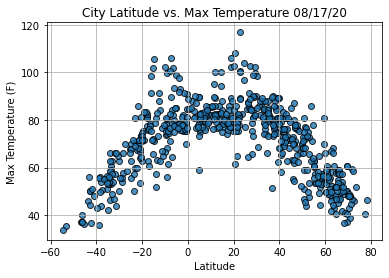

In [167]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

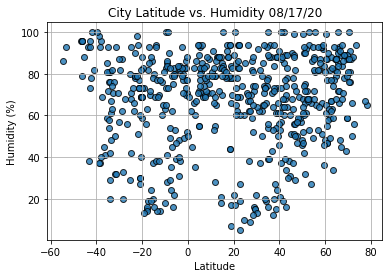

In [168]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

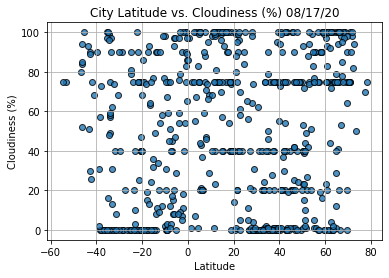

In [169]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

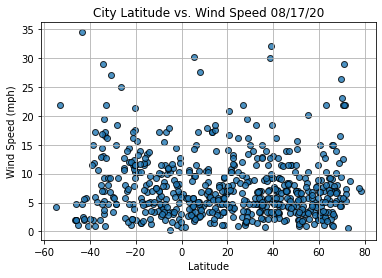

In [170]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [171]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [172]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(linregress(x_values, y_values))
    

In [173]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City               Guerrero Negro
Country                        MX
Date          2020-08-17 15:39:56
Lat                         27.98
Lng                       -114.06
Max Temp                    78.53
Humidity                       59
Cloudiness                     64
Wind Speed                   9.48
Name: 13, dtype: object

In [174]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
583    False
584     True
585     True
586     True
587    False
Name: Lat, Length: 588, dtype: bool

In [175]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Punta Arenas,CL,2020-08-17 15:38:06,-53.15,-70.92,35.60,93,75,21.92
3,3,Hithadhoo,MV,2020-08-17 15:39:52,-0.60,73.08,84.49,71,86,6.55
4,4,Esperance,AU,2020-08-17 15:39:52,-33.87,121.90,46.40,81,57,19.46
6,6,Waingapu,ID,2020-08-17 15:39:53,-9.66,120.26,73.60,83,31,7.00
7,7,Mataura,NZ,2020-08-17 15:39:53,-46.19,168.86,37.00,96,84,1.99


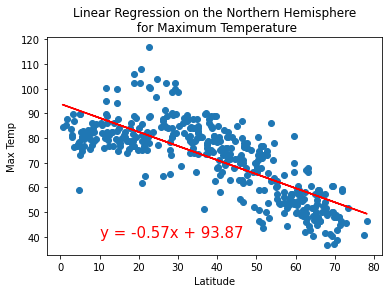

LinregressResult(slope=-0.5692186229247543, intercept=93.87342266985365, rvalue=-0.7634298329492409, pvalue=2.012912459015762e-76, stderr=0.024323497337763105)


In [176]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp', (10,40))

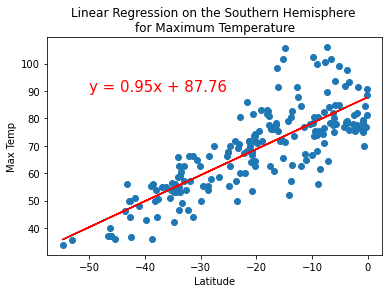

LinregressResult(slope=0.9492221565293103, intercept=87.75628057592934, rvalue=0.8056501327497984, pvalue=1.5605913533346137e-45, stderr=0.050370898271471114)


In [177]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

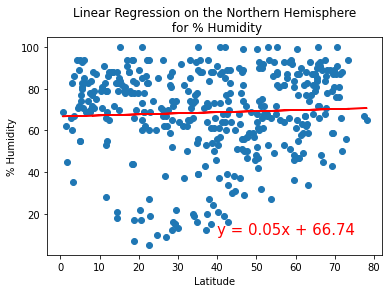

LinregressResult(slope=0.05070819864916637, intercept=66.7423639296715, rvalue=0.047811257589806234, pvalue=0.34386685756712454, stderr=0.053506683586192115)


In [178]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

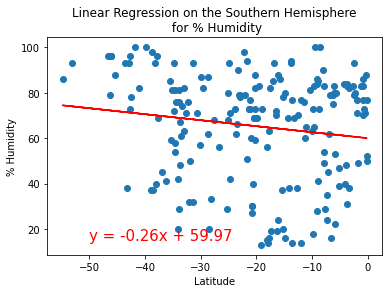

LinregressResult(slope=-0.26395060912265567, intercept=59.97054690078635, rvalue=-0.14865320152567357, pvalue=0.0385811529169119, stderr=0.12672009928396416)


In [179]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

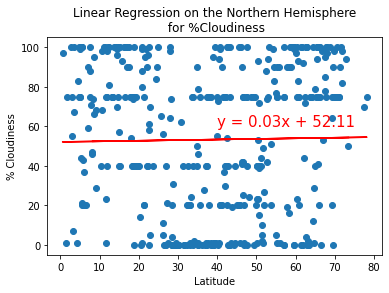

LinregressResult(slope=0.03042105833472481, intercept=52.10648057410532, rvalue=0.01652134457130968, pvalue=0.743728618946322, stderr=0.09298793789873355)


In [180]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for %Cloudiness', '% Cloudiness',(40,60))

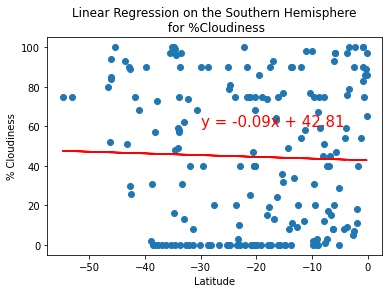

LinregressResult(slope=-0.08707474960826439, intercept=42.8075682173072, rvalue=-0.031635016992488656, pvalue=0.6614682731649394, stderr=0.19854370578811983)


In [181]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for %Cloudiness', '% Cloudiness',(-30, 60))

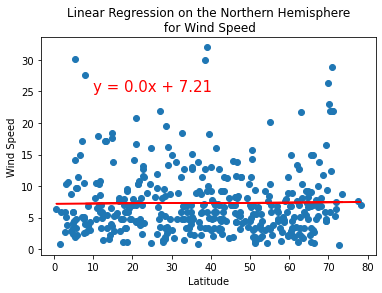

LinregressResult(slope=0.002971832837296294, intercept=7.206726796233573, rvalue=0.01154745930355607, pvalue=0.8192654175160695, stderr=0.012997683159675984)


In [182]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(10,25))

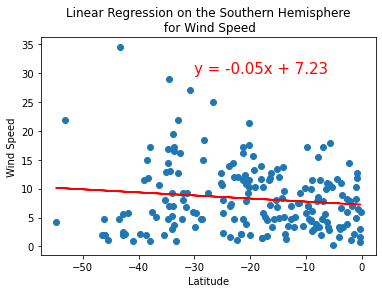

LinregressResult(slope=-0.05294264703994795, intercept=7.230142120834308, rvalue=-0.12178522482354914, pvalue=0.09071994263177642, stderr=0.03113978877924087)


In [183]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed', (-30,30))